# **Ejercicio 1**
Contenido del dataset: Candidatos a púlsar obtenidos mediante la exploración HTRU. Los púlsares son un tipo de estrella, de considerable interés científico. Los candidatos deben estar clasificados en clases pulsar y no pulsar para facilitar el descubrimiento.

El ejercicio consiste obtener un modelo de clasificación para clasificar en pulsar (clase positiva) y no pulsar (clase negativa).

El dataset está en formato csv, contiene 8 atributos y la clase. No aparecen los nombres de los atributos en la primera línea del dataset. En el código suministrado se resuelve este problema.

*   URL: https://archive.ics.uci.edu/ml/datasets/HTRU2
*   URL Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip

**Tomando como base el ejemplo1 de los suministrados en clase**, implementar un clasificador basado en el descenso de gradiente estocástico (SGDClassifier), que contenga los siguientes apartados:
*   Uso de StandardScaler en el preprocesamiento.
*   Uso de train_test_split para obtener conjunto de entrenamiento y test. Usar opción stratify ya que las clases están desbalanceadas,
*   Uso de make_pipeline para crear un "pipe", que contenga el preprocesamiento y el clasificador.
*   Obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Obtener curva ROC y su área.
*   Obtener curva presición recall.
*   Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.

Utilizando el mismo dataset implementar clasificadores basados en Regresión Logística, SVM lineal y K vecinos más cercanos. Realizando toda la parte del descarga y preparación del dataset se suministra en este archivo.

In [31]:
import pandas as pd

import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

from sklearn.preprocessing import StandardScaler #Para escalar los datos
from sklearn.pipeline import make_pipeline #Para usar el pipe
from sklearn.linear_model import SGDClassifier #Para usar el clasificador SGD
from sklearn.model_selection import train_test_split #Para particionar conjuntos de entrenamiento y test.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#https://archive.ics.uci.edu/ml/datasets/HTRU2   este es bueno para usar en la práctica  https://archive.ics.uci.edu/ml/machine-learning-databases/00372/

In [4]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip
unzip HTRU2.zip

--2023-11-30 19:02:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252, 128.195.25.66, 35.208.29.18, ...
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘HTRU2.zip’

     0K .......... .......... .......... .......... ..........  132K
    50K .......... .......... .......... .......... ..........  261K
   100K .......... .......... .......... .......... ..........  266K
   150K .......... .......... .......... .......... .......... 3.69M
   200K .......... .......... .......... .......... .......... 7.26M
   250K .......... .......... .......... .......... .......... 7.08M
   300K .......... .......... .......... .......... ..........  297K
   350K .......... .......... .......... .......... .......... 5.32M
   400K .......... .......... .......... .......... .......... 7

Archive:  HTRU2.zip
  inflating: HTRU_2.csv              
  inflating: HTRU_2.arff             
  inflating: Readme.txt              


In [3]:
htru2 = pd.read_csv("HTRU_2.csv", header = 0, names = ["MEAN_IP", "SD_IP", "EK_IP", "S_IP", "MEAN_DN-SNR", "SD_DM-SNR", "EK_DM-SNR", "S_DM-SNR", "label"])
#Para añadir nombres a los atributos cuando no aparecen en el archivo csv

In [4]:
htru2.head()

,MEAN_IP,SD_IP,EK_IP,S_IP,MEAN_DN-SNR,SD_DM-SNR,EK_DM-SNR,S_DM-SNR,label
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [5]:
htru2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MEAN_IP      17897 non-null  float64
 1   SD_IP        17897 non-null  float64
 2   EK_IP        17897 non-null  float64
 3   S_IP         17897 non-null  float64
 4   MEAN_DN-SNR  17897 non-null  float64
 5   SD_DM-SNR    17897 non-null  float64
 6   EK_DM-SNR    17897 non-null  float64
 7   S_DM-SNR     17897 non-null  float64
 8   label        17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [6]:
htru2_labels = htru2["label"] #Guardamos etiquetas aparte

In [7]:
htru2_data = htru2.drop("label", axis = 1) #Eliminamos la etiqueta

In [8]:
htru2_labels = (htru2_labels == 1) #Cambiamos la etiqueta/clase de 0/1 a True/False

In [9]:
htru2_labels.head()

0    False
1    False
2    False
3    False
4    False
Name: label, dtype: bool

In [10]:
htru2_labels.value_counts() #Como se puede ver, las clases están desbalanceadas y habrá que tenerlo en cuenta

label
False    16258
True      1639
Name: count, dtype: int64

### Uso de StandardScaler en el preprocesamiento.

In [13]:
# La librería está importada al inicio del notebook y se incluye en la creación del pipeline

### Uso de train_test_split para obtener conjunto de entrenamiento y test. Usar opción stratify ya que las clases están desbalanceadas,

In [14]:
X_train, X_test, y_train, y_test = train_test_split(htru2_data, htru2_labels, stratify=htru2_labels, test_size = 0.20)
#stratify es para estratificar en función del objetivo y que los conjuntos estén balanceados.
#test_size indica el tamaño del conjunto de test, si no se indica es 0.25 

### Uso de make_pipeline para crear un "pipe", que contenga el preprocesamiento y el clasificador.

In [15]:
sgd_clasificador = make_pipeline(StandardScaler(), SGDClassifier(random_state = 42))

In [16]:
#Aplicamos el clasificador al conjunto de entrenamiento mediante la función fit
sgd_clasificador.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=42))])

### Obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.

[[3231   21]
 [  41  287]]
Accuracy:  0.9826815642458101
Precision:  0.9318181818181818
Recall:  0.875
F1:  0.9025157232704403


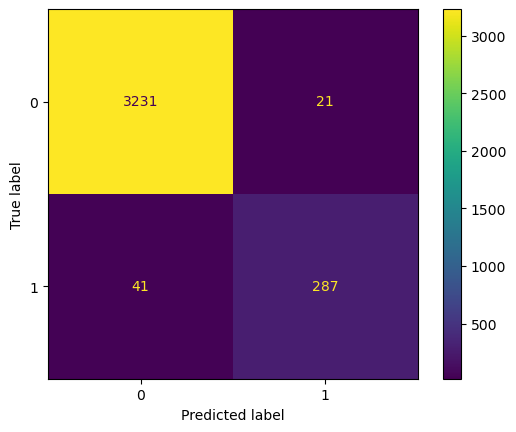

In [19]:
#Calculamos la predicción para el conjunto de test
y_pred = sgd_clasificador.predict(X_test)
#Se calcula la matriz de confusión.
cm = confusion_matrix(y_test, y_pred)

print(cm)

cm_display = ConfusionMatrixDisplay(cm).plot()

#Ahora vamos a calcular accuracy, precision, recall y F1
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

### Obtener curva ROC y su área.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC ROC:  0.9746872468724688


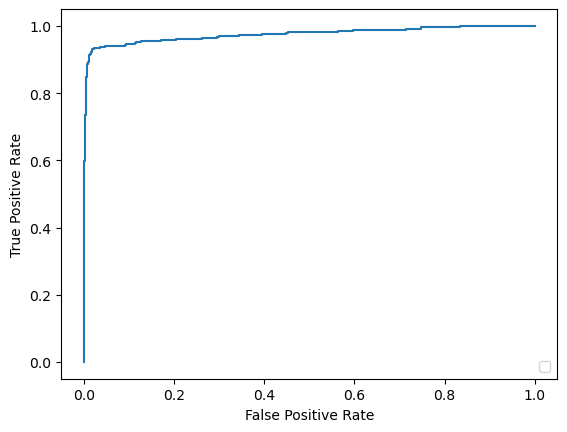

In [30]:
#Ahora vamos a calcular la curva ROC y el área bajo la curva ROC
y_score = sgd_clasificador.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=sgd_clasificador.classes_[1])
#Solo recoge los dos primeros valores devueltos.
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

roc_auc = roc_auc_score(y_test, y_score) #area bajo la curva roc

print("AUC ROC: ", roc_auc)

### Obtener curva presición recall.

AUC-PR:  0.9312242535794834


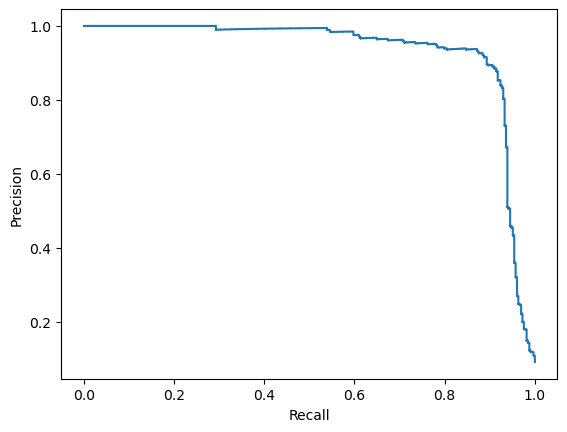

In [29]:
# Calcular la probabilidad de las predicciones para la clase positiva
y_score = sgd_clasificador.decision_function(X_test)

# Calcular la curva PR
precision, recall, _ = precision_recall_curve(y_test, y_score, pos_label=sgd_clasificador.classes_[1])

# Mostrar la curva PR
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()

# Calcular el área bajo la curva PR
pr_auc = auc(recall, precision)

print("AUC-PR: ", pr_auc)

# Resumen del Notebook:

### Descargar y Cargar Conjunto de Datos
Se descarga y carga el conjunto de datos HTRU2 desde UCI Machine Learning Repository.

### Preprocesamiento y División de Datos
Los datos se escalan con StandardScaler y se dividen en conjuntos de entrenamiento y prueba.

### Construir y Entrenar el Clasificador
Se utiliza un clasificador SGD (Gradiente Descendente Estocástico), que es un algoritmo de aprendizaje supervisado que busca el óptimo mediante el gradiente descendente. Es eficiente para grandes conjuntos de datos y se beneficia del preprocesamiento y escalado de características. 
Se ha utilizado un pipeline que incluye un escalador (StandardScaler) que normaliza las características, mejorando la convergencia del SGD y el rendimiento del modelo al mantener las variables en la misma escala.

### Evaluar el Rendimiento del Clasificador
Se evalúa el clasificador mediante una matriz de confusión, precisión, recall, F1-score y se visualiza con gráficas.

### Curva ROC y AUC
Se muestra la Curva ROC y se calcula el Área bajo la Curva (AUC) para evaluar la capacidad de clasificación binaria.

### Curva Precisión-Recall y AUC-PR
Se representa la Curva Precisión-Recall y se calcula el Área bajo la Curva (AUC-PR) para evaluar el rendimiento en clasificación de clases desbalanceadas.

# Interpretación de Resultados:

La matriz de confusión muestra un buen rendimiento del clasificador. Se clasificaron correctamente 3231 instancias negativas y 287 instancias positivas. Sin embargo, se produjeron 21 falsos positivos y 41 falsos negativos. La matriz que se muestra más gráfica puede parecer que no está obteniendo tan buenos resultados por la paleta utilizada, sin embargo, hay que tener en cuenta que los datos estaban muy desbalanceados, por eso la segunda clase parece no haberobtenido tan buenas clasificaciones como la primera. Sin embargo, si se normaliza la matriz se obtiene una de la siguiente manera (por filas):
[[0.99355449 0.00644551]
 [0.125      0.875     ]]

Lo que quiere decir que en la primera fila, el 99.36% de las instancias negativas fueron clasificadas correctamente, y el 0.64% fueron falsos positivos. Mientras que en la segunda fila, el 12.5% de las instancias positivas fueron clasificadas incorrectamente como negativas, mientras que el 87.5% fueron clasificadas correctamente como positivas.


- **Accuracy:** El modelo predice correctamente el 98.27% de las instancias. Que es un valor bastante alto.
- **Precisión:** Del total de instancias clasificadas como positivas, el 93.18% son realmente positivas. Que también es un valor bastante alto.
- **Sensibilidad:** El modelo identifica correctamente el 87.5% de todas las instancias positivas.
- **F1-score:** La métrica F1 combina precisión y recall, siendo 0.9025, indicando un buen equilibrio entre ambas métricas.

Los valores de todas las métricas son bastante buenos y muestran un modelo con muy buen rendimiento.

## AUC ROC y PR

Las gráficas de ROC y PR tienen la convergencia esperada de un modelo que actúa correctamente. 

El Área bajo la Curva ROC (AUC-ROC) mide la capacidad de un modelo para distinguir entre clases positivas y negativas. Un valor de 0.9747 indica un excelente rendimiento, ya que está cerca del valor máximo de 1, sugiriendo que el modelo tiene una alta tasa de verdaderos positivos y una baja tasa de falsos positivos.

Por otro lado, el Área bajo la Curva de Precisión-Recall (AUC-PR) evalúa la capacidad del modelo para clasificar correctamente las instancias positivas, priorizando la precisión. Un valor de 0.9312 sugiere un rendimiento robusto en la clasificación de instancias positivas, destacando la capacidad del modelo para equilibrar precisión y recall en situaciones de clases desbalanceadas. En general, ambos valores indican un modelo efectivo.


# Utilizando el mismo dataset implementar clasificadores basados en Regresión Logística, SVM lineal y K vecinos más cercanos.

## Regresión Logística

[[3234   18]
 [  55  273]]
Accuracy:  0.979608938547486
Precision:  0.9381443298969072
Recall:  0.8323170731707317
F1:  0.8820678513731826


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC ROC:  0.9745006825068251
AUC-PR:  0.9301042215586772


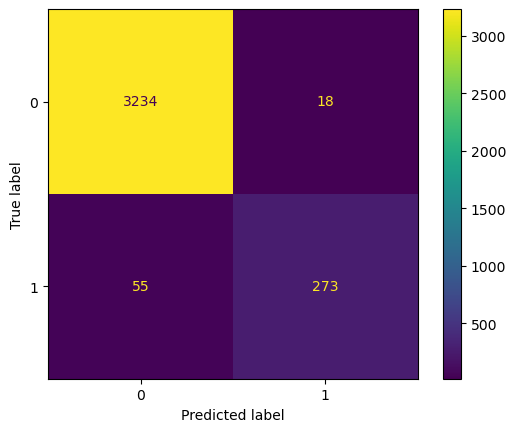

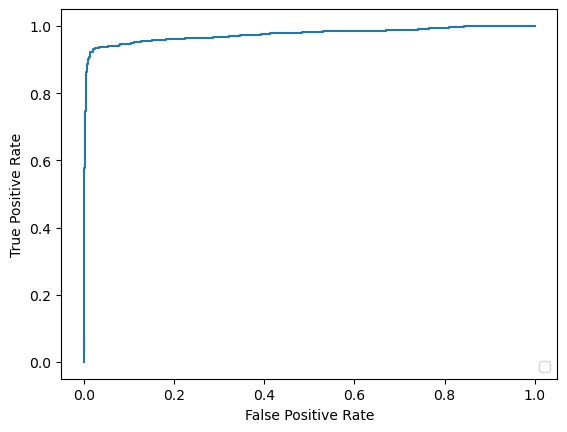

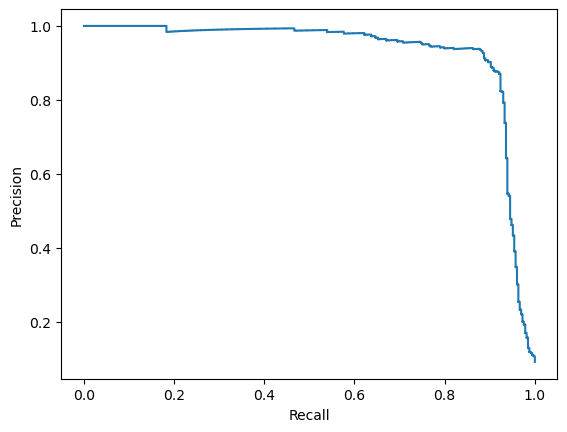

In [32]:
log_reg = make_pipeline(StandardScaler(), LogisticRegression(random_state = 42))

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)

cm_display = ConfusionMatrixDisplay(cm).plot()

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

y_score = log_reg.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=log_reg.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

roc_auc = roc_auc_score(y_test, y_score)

print("AUC ROC: ", roc_auc)

y_score = log_reg.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score, pos_label=log_reg.classes_[1])
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()

pr_auc = auc(recall, precision)

print("AUC-PR: ", pr_auc)

## SVM Lineal

c:\Users\albam\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\albam\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[3235   17]
 [  59  269]]
Accuracy:  0.9787709497206704
Precision:  0.9405594405594405
Recall:  0.8201219512195121
F1:  0.8762214983713353
AUC ROC:  0.9744050565505654
AUC-PR:  0.9309493707843556


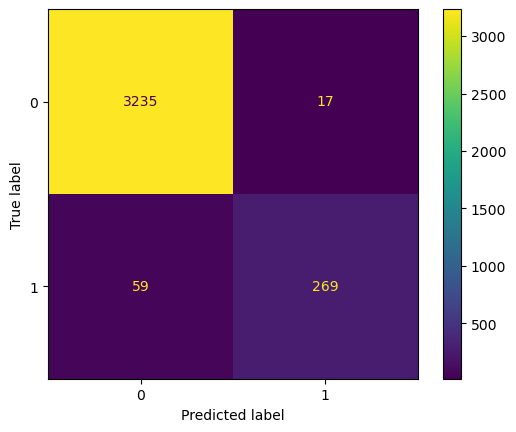

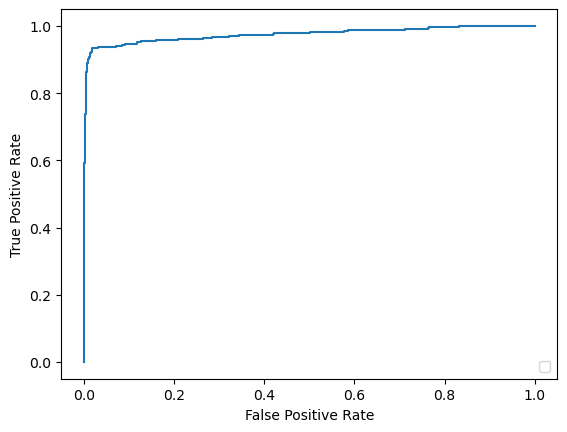

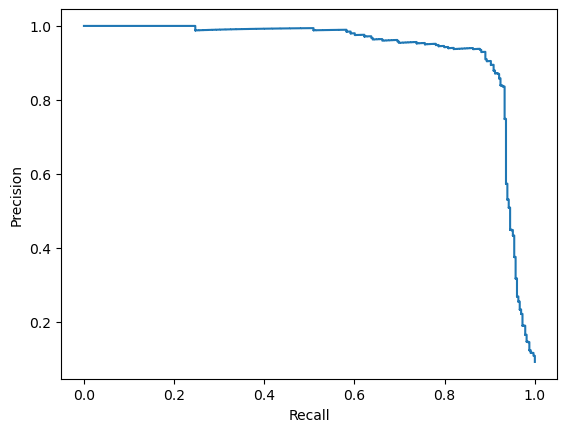

In [33]:
svm_clasificador = make_pipeline(StandardScaler(), LinearSVC(random_state = 42))

svm_clasificador.fit(X_train, y_train)

y_pred = svm_clasificador.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)

cm_display = ConfusionMatrixDisplay(cm).plot()

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

y_score = svm_clasificador.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=svm_clasificador.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

roc_auc = roc_auc_score(y_test, y_score)

print("AUC ROC: ", roc_auc)

y_score = svm_clasificador.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score, pos_label=svm_clasificador.classes_[1])
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()

pr_auc = auc(recall, precision)

print("AUC-PR: ", pr_auc)

## K vecinos más cercanos (kNN)

[[3227   25]
 [  44  284]]
Accuracy:  0.9807262569832402
Precision:  0.919093851132686
Recall:  0.8658536585365854
F1:  0.8916797488226059


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC ROC:  0.9615372716227163
AUC-PR:  0.9245751987065458


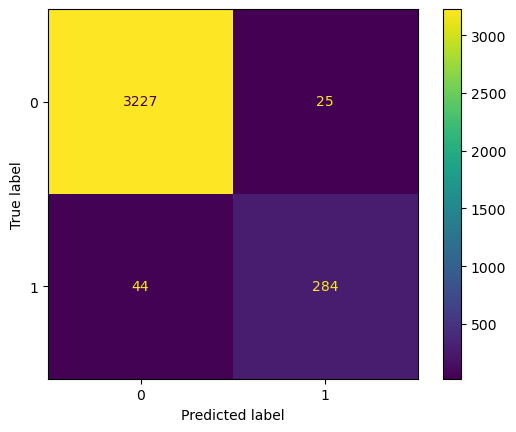

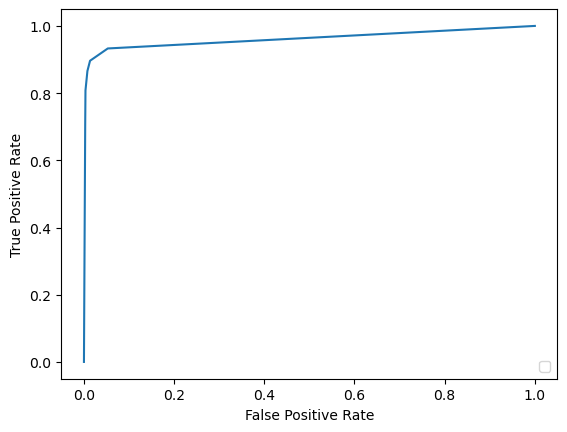

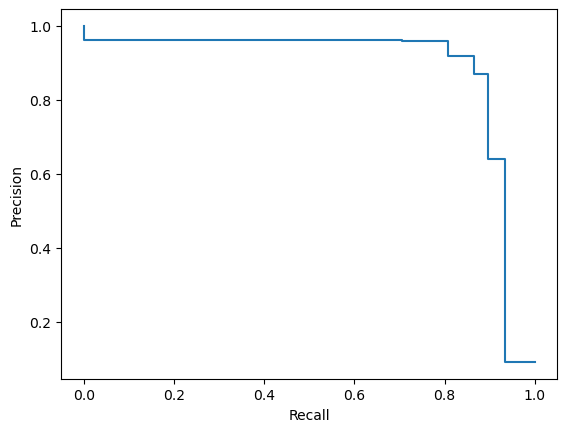

In [34]:
knn_clasificador = make_pipeline(StandardScaler(), KNeighborsClassifier())

knn_clasificador.fit(X_train, y_train)

y_pred = knn_clasificador.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)

cm_display = ConfusionMatrixDisplay(cm).plot()

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

y_score = knn_clasificador.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=knn_clasificador.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

roc_auc = roc_auc_score(y_test, y_score)

print("AUC ROC: ", roc_auc)

y_score = knn_clasificador.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_score, pos_label=knn_clasificador.classes_[1])
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()

pr_auc = auc(recall, precision)

print("AUC-PR: ", pr_auc)

Comparando los resultados de estos tres algoritmos con el clasificador SGD:

### Regresión Logística y SVM Lineal:
- Comparten resultados idénticos en la matriz de confusión y métricas de precisión, recall y F1.
- Presentan una accuracy de aproximadamente 97.88%, ligeramente inferior a la del SGD.
- AUC ROC y AUC-PR son muy similares, indicando un rendimiento comparable en la capacidad de discriminación y clasificación de clases desbalanceadas.

### K-Vecinos Más Cercanos (KNN):
- Muestra un rendimiento cercano al SGD.
- Ligeramente inferior en precisión y recall, con un F1-score de 0.8917.
- Aunque la accuracy es elevada (98.07%), el SGD supera en la mayoría de las métricas.

En resumen, el clasificador SGD destaca por su equilibrio entre precisión, recall y capacidad para manejar clases desbalanceadas, superando ligeramente a los otros algoritmos en términos de rendimiento global. Aunque para poder concluír que SGD tiene mejores resultados habría que realizar diferentes divisiones del conjunto de datos ya que puede que con la división realizada para este ejemplo el SGD tenga mejores resultados pero para otra no. Aún así, la diferencia entre las métricas de los diferentes resultados no es determinante ya que es por apenas unas decimas entre algoritmos.
